## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice= data_df['Mouse ID'].value_counts()
number_mice = len(mice)
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data_df.loc[data_df.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
duplicate


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = pd.DataFrame(duplicate)
duplicate_mouse_id


,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df[data_df['Mouse ID'].isin(duplicate)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean = clean_data_df["Mouse ID"].value_counts()
clean_mice = len(clean)
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drugreg_df = clean_data_df.groupby('Drug Regimen')
drugreg_df.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = drugreg_df['Tumor Volume (mm3)'].mean()

tumor_median = drugreg_df['Tumor Volume (mm3)'].median()

tumor_variance = drugreg_df['Tumor Volume (mm3)'].var()

tumor_stdev = drugreg_df['Tumor Volume (mm3)'].std()

tumor_sem = drugreg_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
drugreg_ssm_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance' : tumor_variance, 
                               'Standard Deviation' : tumor_stdev, 'SEM': tumor_sem})
drugreg_ssm_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_regimen_df = clean_data_df.groupby('Drug Regimen')
summ_statregimen_table = agg_regimen_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summ_statregimen_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

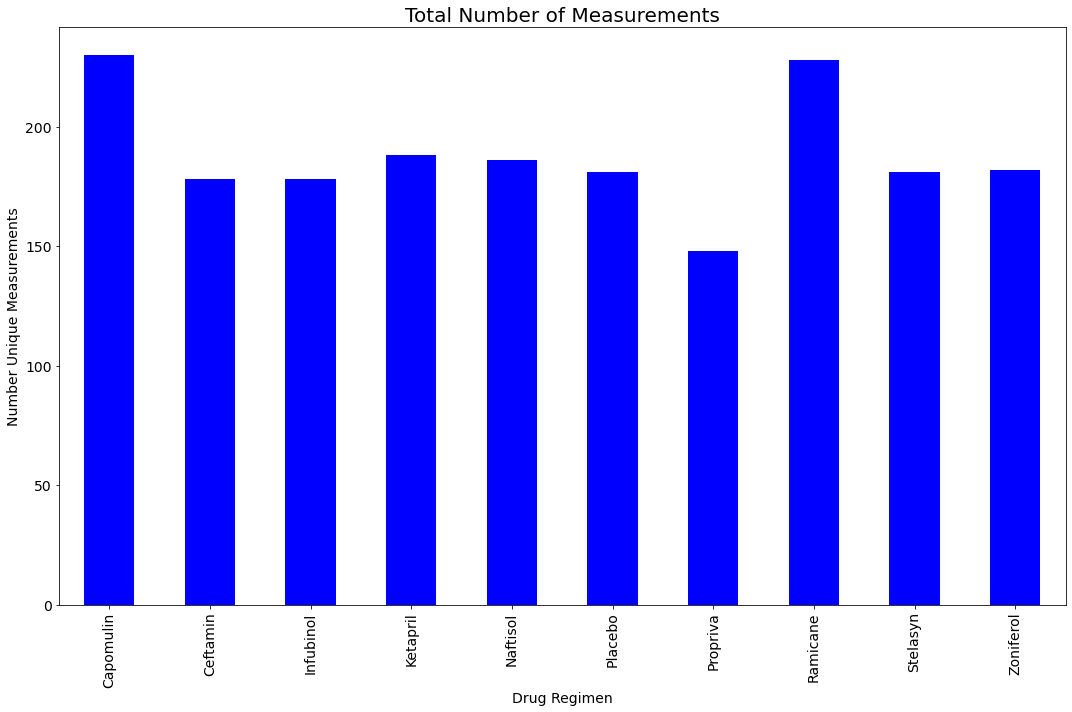

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements_drug = clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]


plot_measurements = measurements_drug.plot.bar(figsize=(15,10), color='b',fontsize = 14)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number Unique Measurements",fontsize = 14)
plt.title("Total Number of Measurements",fontsize = 20)

plt.savefig("../Images/measurements_drug.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()



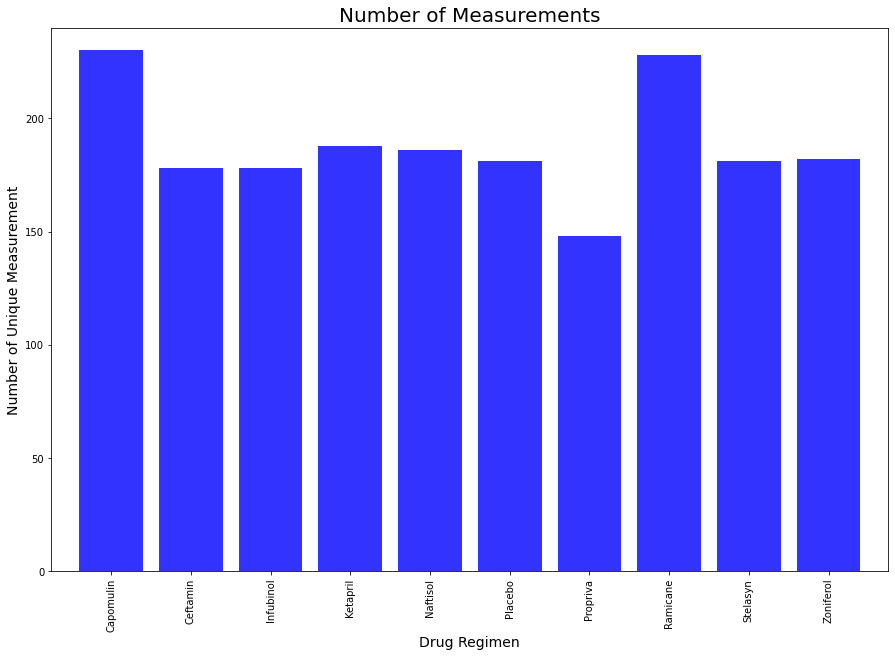

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_count  =(clean_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
drug_count
import numpy as np
x_axis = np.arange(len(measurements_drug))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, drug_count, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(drug_count)+10)

plt.title("Number of Measurements",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Unique Measurement",fontsize = 14)

plt.savefig("../Images/measurements_pyplot.png", bbox_inches = "tight")

<ipython-input-45-b9b5cd312dc6>:27: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal",fontsize = 12)


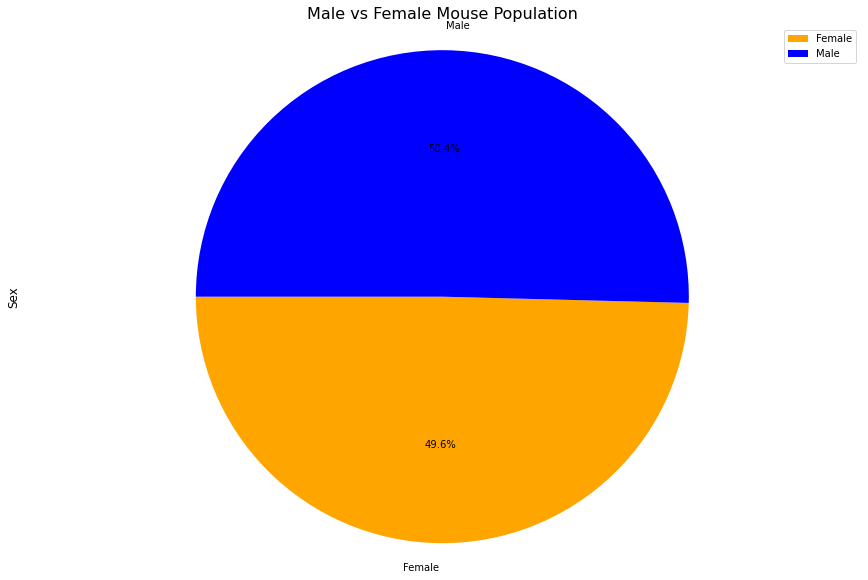

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#  Group by gender and get the number to plot
gendergroup_df = clean_data_df.groupby(["Mouse ID","Sex"])
gendergroup_df
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

colors = ['orange', 'blue']

plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=180, autopct="%.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 16)
plt.ylabel('Sex',fontsize = 12)
plt.axis("equal",fontsize = 12)

plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()

<ipython-input-48-01611e37603c>:17: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal",fontsize = 12)


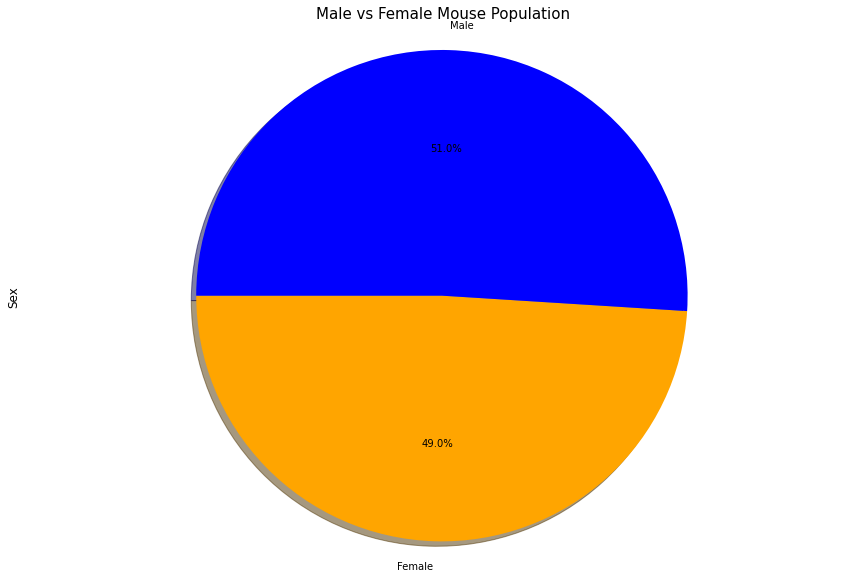

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49,51]

#Set colors for each section of the pie
colors = ['orange', 'blue']

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180,)
plt.title('Male vs Female Mouse Population',fontsize = 15)
plt.ylabel('Sex',fontsize = 12)
#Set equal axis
plt.axis("equal",fontsize = 12)

plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
